In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'E:\Datasets\Credit Card Fraud Prediction\fraud_test_csv.csv')

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [1]:
import os

notebook_path = os.getcwd()
print(notebook_path)

C:\Users\hp


In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.isnull().sum() #no null columns

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [29]:
df.shape

(555719, 23)

In [4]:
#drop columns -> Unnamed:0, cc_num, first, last,street, dob, trans_num, zip
df.drop(['Unnamed: 0', 'cc_num', 'first', 'last','street', 'dob', 'trans_num', 'zip'],axis=1,inplace=True)

df.drop(['merchant','city','state','job'],axis=1,inplace=True)

In [7]:
df.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,21-06-2020 12:14,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,21-06-2020 12:14,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,21-06-2020 12:14,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,21-06-2020 12:15,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,21-06-2020 12:15,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [22]:
category = ['merchant','category','city','state','job']
for i in category:
    print([i,df[i].nunique()])

['merchant', 693]
['category', 14]
['city', 849]
['state', 50]
['job', 478]


In [8]:
df['job'].sample(5)

56361                    Bookseller
400817              Camera operator
188074                Airline pilot
41625                       Barista
254209    Trading standards officer
Name: job, dtype: object

In [ ]:
# we can delete columns like city and state as we will apply DBSCAN and form clusters based on lat and long
# we can delete job as we have category which will make more sense
# merchant is irrelevant to the dataset

In [11]:
df.head()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,21-06-2020 12:14,personal_care,2.86,M,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,21-06-2020 12:14,personal_care,29.84,F,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,21-06-2020 12:14,health_fitness,41.28,F,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,21-06-2020 12:15,misc_pos,60.05,M,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,21-06-2020 12:15,travel,3.19,M,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


In [5]:
# final categorical columns
cat_col =['category','gender']
for i in cat_col:
        dummy=pd.get_dummies(df[i],drop_first=True,prefix=i)
        df=pd.concat([df,dummy],axis=1)
        del df[i]
        
del dummy

In [94]:
df.columns

Index(['trans_date_trans_time', 'amt', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M'],
      dtype='object')

In [33]:
df.head()

,trans_date_trans_time,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,21-06-2020 12:14,2.86,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,0,...,0,0,0,0,0,1,0,0,0,1
1,21-06-2020 12:14,29.84,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,0,...,0,0,0,0,0,1,0,0,0,0
2,21-06-2020 12:14,41.28,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,0,...,1,0,0,0,0,0,0,0,0,0
3,21-06-2020 12:15,60.05,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,0,...,0,0,0,0,1,0,0,0,0,1
4,21-06-2020 12:15,3.19,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,0,...,0,0,0,0,0,0,0,0,1,1


C:\Users\hp\AppData\Local\Temp\ipykernel_9020\2641796776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amt'],


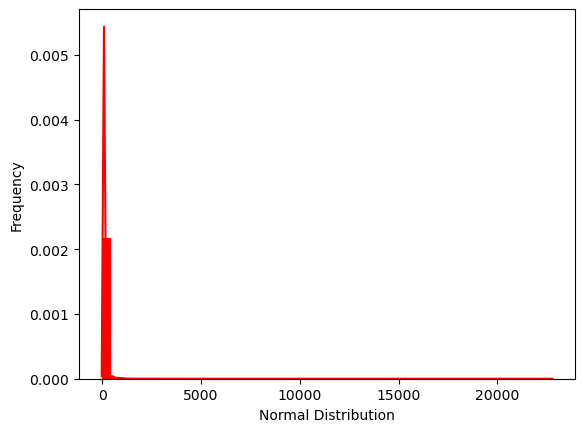

In [17]:
# exploring the distribution of numerical columns
sns.distplot(df['amt'],
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1}).set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

# Sampling the data

In [6]:
subset_data = df.sample(n=20000)

# DBSCAN to create clusters

In [7]:
from sklearn.cluster import DBSCAN
import numpy as np

In [8]:
latitude_longitude_data = np.array(subset_data[['lat', 'long']].values)

dbscan = DBSCAN(eps=1, min_samples=5)

dbscan.fit(latitude_longitude_data)

DBSCAN(eps=1)

In [80]:
latitude_longitude_data

array([[ 41.4622, -79.1306],
       [ 34.7789, -86.5438],
       [ 38.138 , -89.2231],
       ...,
       [ 43.4987, -90.2796],
       [ 44.8955, -85.4082],
       [ 32.8224, -85.7704]])

In [10]:
# Get cluster labels
cluster_labels = dbscan.labels_

In [84]:
dftrain['long'].isnull().sum()

0

In [11]:
# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f'Number of clusters: {n_clusters}')

Number of clusters: 95


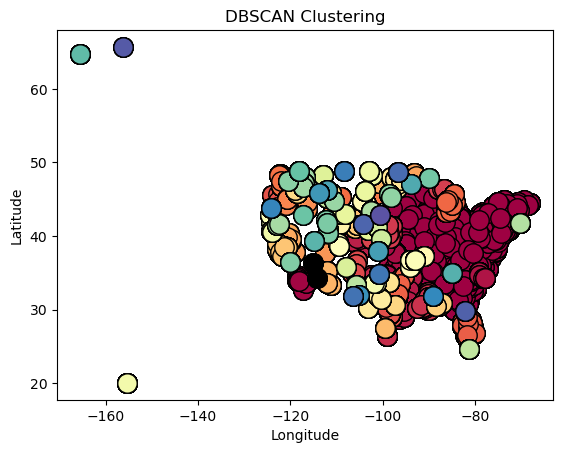

In [12]:
# Plot clusters
unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (cluster_labels == k)

    xy = latitude_longitude_data[class_member_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Number of clusters: 6


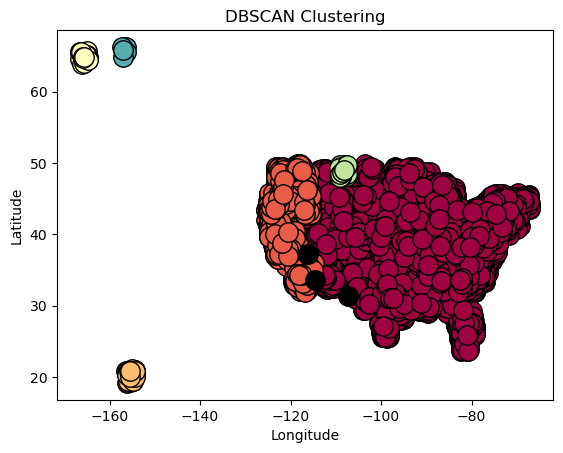

In [13]:
merchant_latitude_longitude_data = np.array(subset_data[['merch_lat', 'merch_long']].values)
dbscan = DBSCAN(eps=1, min_samples=2)
dbscan.fit(merchant_latitude_longitude_data)

merch_cluster_labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(merch_cluster_labels)) - (1 if -1 in merch_cluster_labels else 0)
print(f'Number of clusters: {n_clusters}')

# Plot clusters
unique_labels = set(merch_cluster_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (merch_cluster_labels == k)

    xy = merchant_latitude_longitude_data[class_member_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [14]:
subset_data.shape

(20000, 23)

In [154]:
print(cluster_labels)
print(merch_cluster_labels)

[ 0  1  2 ...  2 35  2]
[0 0 0 ... 0 0 0]


In [15]:
subset_data['cluster'] = cluster_labels
subset_data['merch_cluster'] = merch_cluster_labels

In [27]:
dftrain.head()

,trans_date_trans_time,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category_food_dining,...,cluster_labels_84,cluster_labels_85,cluster_labels_86,cluster_labels_87,cluster_labels_88,cluster_labels_89,cluster_labels_90,cluster_labels_91,cluster_labels_92,cluster_labels_93
248717,20-09-2020 09:52,30.66,30.2816,-99.2410,2395.0,1.379671e+09,30.932165,-100.188317,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98993,26-07-2020 04:23,85.93,31.4467,-103.5791,12747.0,1.374813e+09,30.546675,-104.344132,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439221,06-12-2020 15:32,8.39,40.0369,-75.0664,1526206.0,1.386344e+09,40.899433,-75.219249,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266910,28-09-2020 04:07,1.73,42.9580,-77.3083,10717.0,1.380341e+09,42.642694,-77.556595,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346969,02-11-2020 07:11,1.71,33.1410,-84.1759,4138.0,1.383376e+09,33.559680,-84.634680,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
subset_data['cluster'].value_counts()

0     12268
1       609
14      551
7       514
6       450
      ...  
52        6
82        6
63        6
94        6
95        5
Name: cluster, Length: 97, dtype: int64

In [172]:
subset_data['merch_cluster'].value_counts()

 0    19877
 1       42
 2       28
 3       23
 4       22
 5        5
 6        2
-1        1
Name: merch_cluster, dtype: int64

In [58]:
dftrain['cluster'].dtype

dtype('O')

In [16]:
subset_data['cluster'] = subset_data['cluster'].astype(str)
subset_data['merch_cluster'] = subset_data['merch_cluster'].astype(str)

# Get dummies of clusters

In [17]:
dummy = pd.get_dummies(subset_data['cluster'],prefix='customer')
subset_data=pd.concat([subset_data,dummy],axis=1)
del dummy

In [18]:
dummy = pd.get_dummies(subset_data['merch_cluster'],prefix='merchant')
subset_data=pd.concat([subset_data,dummy],axis=1)
del dummy

In [176]:
subset_data.head()

,trans_date_trans_time,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category_food_dining,...,customer_94,customer_95,merchant_-1,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6
182773,24-08-2020 13:12,31.84,32.5486,-80.3070,2408,1377349930,33.485440,-79.494825,0,0,...,0,0,0,1,0,0,0,0,0,0
121195,02-08-2020 21:22,3.35,40.8130,-83.4196,118,1375478524,40.920102,-84.080073,0,1,...,0,0,0,1,0,0,0,0,0,0
534888,27-12-2020 16:48,1.48,34.2853,-91.3336,5161,1388162916,34.011996,-91.245990,0,0,...,0,0,0,1,0,0,0,0,0,0
92259,23-07-2020 06:56,62.04,33.3749,-99.8473,178,1374562582,34.039185,-99.264331,0,0,...,0,0,0,1,0,0,0,0,0,0
252824,21-09-2020 18:46,1.48,37.0581,-86.1938,6841,1379789168,36.968672,-86.679188,0,1,...,0,0,0,1,0,0,0,0,0,0


In [19]:
subset_data = subset_data[['trans_date_trans_time','amt','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud',
                  'category_food_dining',
                 'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M','customer_0','customer_1','customer_14','customer_7','merchant_0','merchant_1']]

In [178]:
subset_data.head()

,trans_date_trans_time,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category_food_dining,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,customer_0,customer_1,customer_14,customer_7,merchant_0,merchant_1
182773,24-08-2020 13:12,31.84,32.5486,-80.3070,2408,1377349930,33.485440,-79.494825,0,0,...,0,0,0,0,1,0,0,0,1,0
121195,02-08-2020 21:22,3.35,40.8130,-83.4196,118,1375478524,40.920102,-84.080073,0,1,...,0,0,0,0,1,0,0,0,1,0
534888,27-12-2020 16:48,1.48,34.2853,-91.3336,5161,1388162916,34.011996,-91.245990,0,0,...,1,0,0,0,1,0,0,0,1,0
92259,23-07-2020 06:56,62.04,33.3749,-99.8473,178,1374562582,34.039185,-99.264331,0,0,...,0,0,0,0,0,1,0,0,1,0
252824,21-09-2020 18:46,1.48,37.0581,-86.1938,6841,1379789168,36.968672,-86.679188,0,1,...,0,0,0,0,1,0,0,0,1,0


In [20]:
#drop zipcode, lat, long, merch_lat,merch_long as it is no longer needed
subset_data.drop(['lat', 'long', 'merch_lat','merch_long'],inplace=True,axis=1)
subset_data.drop('unix_time',axis=1,inplace=True)

subset_data.drop('trans_date_trans_time',axis=1,inplace=True)

# Train test split

In [21]:
from sklearn.model_selection import train_test_split
dftrain,dftest=train_test_split(subset_data,test_size=0.2,random_state=1)

In [22]:
xtrain=dftrain.drop('is_fraud',axis=1)
ytrain=dftrain['is_fraud']
xtest=dftest.drop('is_fraud',axis=1)
ytest=dftest['is_fraud']

# Data Modelling

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.xgboost import XGBClassifier
from sklearn import svm

In [24]:
from sklearn.metrics import fbeta_score

### Logistic Regression

In [25]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(xtrain,ytrain)

LogisticRegression(class_weight='balanced')

In [26]:
predict_lr=lr.predict(xtest)

fbeta_score(ytest, predict_lr, beta=2)

0.02844141069397042

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predict_lr,ytest)
cm

array([[ 564,    0],
       [3416,   20]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
score = accuracy_score(predict_lr,ytest)
score

0.146

### Random Forest

In [29]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=2, random_state=0)

In [30]:
predict_rf = rf.predict(xtest)

In [31]:
cm_rf=confusion_matrix(predict_rf,ytest)
cm_rf

array([[3980,   20],
       [   0,    0]], dtype=int64)

In [32]:
score_rf = accuracy_score(predict_rf,ytest)
score_rf

0.995

### Decision Tree

In [33]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [34]:
predict_dt=dt.predict(xtest)

In [35]:
cm_dt=confusion_matrix(predict_dt,ytest)
cm_dt

array([[3975,   10],
       [   5,   10]], dtype=int64)

In [36]:
score_dt = accuracy_score(predict_dt,ytest)
score_dt

0.99625

### SVM

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
scaled_data = scaler.fit_transform(dftrain)

In [40]:
scaled_df = pd.DataFrame(scaled_data, columns=dftrain.columns)

In [41]:
scaled_train,scaled_test=train_test_split(scaled_df,test_size=0.2,random_state=1)
scaled_x_train=scaled_train.drop('is_fraud',axis=1)
scaled_y_train=scaled_train['is_fraud']
scaled_x_test=scaled_test.drop('is_fraud',axis=1)
scaled_y_test=scaled_test['is_fraud']

In [42]:
svmc = svm.SVC()
svmc.fit(scaled_x_train, scaled_y_train)

ValueError: Unknown label type: 'continuous'

In [43]:
import pickle

In [44]:
pickle.dump(rf,open('random_forest.pkl','wb'))

In [45]:
pickled_model=pickle.load(open('random_forest.pkl','rb'))

In [ ]:
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))